
# Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones

<center>
<img 
     src="http://www2.famaf.unc.edu.ar/~efernandez/egeo/img/logos/famaf.jpg" 
     alt="Drawing" 
     style="width:100px;"
/>
</center>

### Universidad Nacional de Córdoba
---

## Practico
### Introduccion al Aprendizaje Automatico


Grupo 2: Luciano Mantovani, Juan Ignacio Barrionuevo Galtier, Antonela Sambuceti

## 1. Preparación del conjunto de datos

### Importacion de librerias

In [1]:
import pyarrow
import fastparquet
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import Normalizer 
from sklearn.tree import plot_tree

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_parquet("df_supervisado_agrupado.parquet")
df

,dni_titular_movimiento,anio_mes_cupon,client__edad,client__antig,client__x0_Hombre,client__x0_Mujer,client__x0_Sin Datos,client__x1_Sector_Educativo,client__x1_Sector_Empleado_Comercio,client__x1_Sector_Financiero,...,trans__x3_1,trans__x3_2,trans__x3_3,trans__x3_4,trans__x3_5,trans__x3_6,trans__x3_7,trans__x3_8,trans__x3_9,monto_ajustado
0,000000b5aea2c9ea7cc155f6ebcef97f826,202008.0,46.0,225.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.72
1,000000b5aea2c9ea7cc155f6ebcef97f826,202009.0,47.0,226.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.61
2,000000b5aea2c9ea7cc155f6ebcef97f826,202010.0,47.0,227.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.46
3,000000b5aea2c9ea7cc155f6ebcef97f826,202011.0,47.0,228.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.34
4,000000b5aea2c9ea7cc155f6ebcef97f826,202012.0,47.0,229.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405,000f0b73ebfa002a79a0642b82e87919904,202101.0,64.0,21.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11616.45
7406,000f0b73ebfa002a79a0642b82e87919904,202102.0,64.0,22.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12566.68
7407,000f0b73ebfa002a79a0642b82e87919904,202103.0,64.0,23.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2663.08
7408,000f0b73ebfa002a79a0642b82e87919904,202104.0,64.0,24.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4685.64


In [3]:
print(f'Size: {df.shape}')
df.columns

Size: (7410, 55)


Index(['dni_titular_movimiento', 'anio_mes_cupon', 'client__edad',
       'client__antig', 'client__x0_Hombre', 'client__x0_Mujer',
       'client__x0_Sin Datos', 'client__x1_Sector_Educativo',
       'client__x1_Sector_Empleado_Comercio', 'client__x1_Sector_Financiero',
       'client__x1_Sector_No_Operativo', 'client__x1_Sector_Operativo',
       'client__x1_Sector_Salud', 'client__x1_Sector_Seguridad',
       'client__x1_Sector_Sin_Datos', 'client__x2_Casado', 'client__x2_Otros',
       'client__x2_Sin_datos', 'client__x2_Soltero', 'client__x3_REGION_CUYO',
       'client__x3_REGION_NORDESTE', 'client__x3_REGION_NOROESTE',
       'client__x3_REGION_PAMPEANA', 'client__x3_REGION_PATAGONIA',
       'client__x3_SIN_DATOS', 'trans__x0_AX', 'trans__x0_EX', 'trans__x0_MC',
       'trans__x0_PC', 'trans__x0_PL', 'trans__x0_PN', 'trans__x0_PP',
       'trans__x0_TA', 'trans__x0_VI', 'trans__x0_ZE',
       'trans__x1_American_express', 'trans__x1_Clasica',
       'trans__x1_Master_internacio

### 1.1 Creación de variable categórica 

Creamos una columna para utilizar en los modelos de clasificación, que indica si un cliente ha aumentado su consumo personal mes a mes. El mes inicial para cada cliente se inicializa en 0.

Cabe destacar que a la hora de agrupar los movimientos en cada mes, se considera la fecha de cierre de la tarjeta, por lo cual cada mes comprende desde el dia 25 del mes anterior hasta el dia 24 del corriente, inclusive. 

In [4]:
df_dni_mes_mon = df[['dni_titular_movimiento', 'anio_mes_cupon','monto_ajustado']] \
                        .groupby(['dni_titular_movimiento', 'anio_mes_cupon']).sum('monto_ajustado') \
                        .reset_index() \
                        .sort_values(by=['dni_titular_movimiento', 'anio_mes_cupon'])
df_dni_mes_mon

,dni_titular_movimiento,anio_mes_cupon,monto_ajustado
0,000000b5aea2c9ea7cc155f6ebcef97f826,202008.0,-4.72
1,000000b5aea2c9ea7cc155f6ebcef97f826,202009.0,-4.61
2,000000b5aea2c9ea7cc155f6ebcef97f826,202010.0,-4.46
3,000000b5aea2c9ea7cc155f6ebcef97f826,202011.0,-4.34
4,000000b5aea2c9ea7cc155f6ebcef97f826,202012.0,-4.21
...,...,...,...
7405,000f0b73ebfa002a79a0642b82e87919904,202101.0,11616.45
7406,000f0b73ebfa002a79a0642b82e87919904,202102.0,12566.68
7407,000f0b73ebfa002a79a0642b82e87919904,202103.0,2663.08
7408,000f0b73ebfa002a79a0642b82e87919904,202104.0,4685.64


In [5]:
# Agregación de la nueva columna seteada en 0.
# En la iteración, se le cambia el valor a 1 en caso de que cumpla con las condiciones preestablecidas.

df_dni_mes_mon['fg_aumentado'] = 0
for i in range(1,len(df_dni_mes_mon)):
    if (df_dni_mes_mon.iloc[i]['dni_titular_movimiento'] == df_dni_mes_mon.iloc[i-1]['dni_titular_movimiento']) \
        & (df_dni_mes_mon.iloc[i]['anio_mes_cupon'] > df_dni_mes_mon.iloc[i-1]['anio_mes_cupon']):
            var_mes = df_dni_mes_mon.iloc[i]['monto_ajustado'] - df_dni_mes_mon.iloc[i-1]['monto_ajustado']
            if (var_mes > (abs(df_dni_mes_mon.iloc[i-1]['monto_ajustado'])*0.1)):
                    df_dni_mes_mon.iloc[i,3] = 1

In [6]:
df_dni_mes_mon.head(20)

,dni_titular_movimiento,anio_mes_cupon,monto_ajustado,fg_aumentado
0,000000b5aea2c9ea7cc155f6ebcef97f826,202008.0,-4.72,0
1,000000b5aea2c9ea7cc155f6ebcef97f826,202009.0,-4.61,0
2,000000b5aea2c9ea7cc155f6ebcef97f826,202010.0,-4.46,0
3,000000b5aea2c9ea7cc155f6ebcef97f826,202011.0,-4.34,0
4,000000b5aea2c9ea7cc155f6ebcef97f826,202012.0,-4.21,0
5,000000b5aea2c9ea7cc155f6ebcef97f826,202101.0,-4.08,0
6,000000b5aea2c9ea7cc155f6ebcef97f826,202102.0,-3.97,0
7,000000b5aea2c9ea7cc155f6ebcef97f826,202103.0,-3.83,0
8,000000b5aea2c9ea7cc155f6ebcef97f826,202104.0,-3.72,0
9,000000b5aea2c9ea7cc155f6ebcef97f826,202105.0,-3.64,0


In [7]:
df_dni_mes_mon = df_dni_mes_mon.drop(columns=['monto_ajustado'])

In [8]:
df_dni_mes_mon = df_dni_mes_mon.rename(columns={'dni_titular_movimiento': 'dni_titular_movimiento_c', 'anio_mes_cupon': 'anio_mes_cupon_c'})
df_dni_mes_mon

,dni_titular_movimiento_c,anio_mes_cupon_c,fg_aumentado
0,000000b5aea2c9ea7cc155f6ebcef97f826,202008.0,0
1,000000b5aea2c9ea7cc155f6ebcef97f826,202009.0,0
2,000000b5aea2c9ea7cc155f6ebcef97f826,202010.0,0
3,000000b5aea2c9ea7cc155f6ebcef97f826,202011.0,0
4,000000b5aea2c9ea7cc155f6ebcef97f826,202012.0,0
...,...,...,...
7405,000f0b73ebfa002a79a0642b82e87919904,202101.0,1
7406,000f0b73ebfa002a79a0642b82e87919904,202102.0,0
7407,000f0b73ebfa002a79a0642b82e87919904,202103.0,0
7408,000f0b73ebfa002a79a0642b82e87919904,202104.0,1


In [9]:
df = df.merge( df_dni_mes_mon, 
             left_on=['dni_titular_movimiento', 'anio_mes_cupon'], 
             right_on=['dni_titular_movimiento_c', 'anio_mes_cupon_c']) \
        .drop(columns= ['dni_titular_movimiento_c','anio_mes_cupon_c'])

df.shape

(7410, 56)

### Creación de variable mes ordinal

Creamos una variable ordinal usando los valores de anio_mes_cupon para solucionar el problema numerico que representa el formato año-mes en la variable. Este problema era que se le asignaba más peso al año que al mes. Con nuestro conocimiento de este dataframe, asignamos un orden a ls meses del mismo.

In [10]:
df['o_mes'] = df.anio_mes_cupon.astype('category').cat.codes

### 1.3 Correlación entre las variables

In [11]:
corr = df.corr().round(2)
corr=corr[['monto_ajustado']]
corr.loc[:,'abs_corr']=np.abs(corr['monto_ajustado'])
corr.sort_values(by='abs_corr',ascending = False).style.background_gradient()

,monto_ajustado,abs_corr
monto_ajustado,1.000000,1.000000
trans__x1_Naranja,0.620000,0.620000
trans__x0_PL,0.560000,0.560000
trans__x2_Pesos,0.510000,0.510000
trans__x2_Zeta,0.500000,0.500000
trans__x3_1,0.420000,0.420000
fg_aumentado,0.390000,0.390000
trans__x0_ZE,0.370000,0.370000
trans__x3_9,0.290000,0.290000
trans__x3_5,0.280000,0.280000


En el cuadro anterior, vemos la correlación de las columnas con respecto a monto_ajustado. Podemos ver que el producto 'Plan Largo' y el tipo_producto 'Naranja' estan fuertemente correlacionados con monto_ajustado. Esto es de esperar ya que concentran la mayoria de los casos.

### Correlacion entre todas las variables numericas

En la siguiente figura, ilustramos el mapa de calor para visualizar la correlacion de todas las variables y encontrar aquellas columnas que nos aporten informacion redundante, las cuales habria que descartar a la hora de instanciar los modelos.

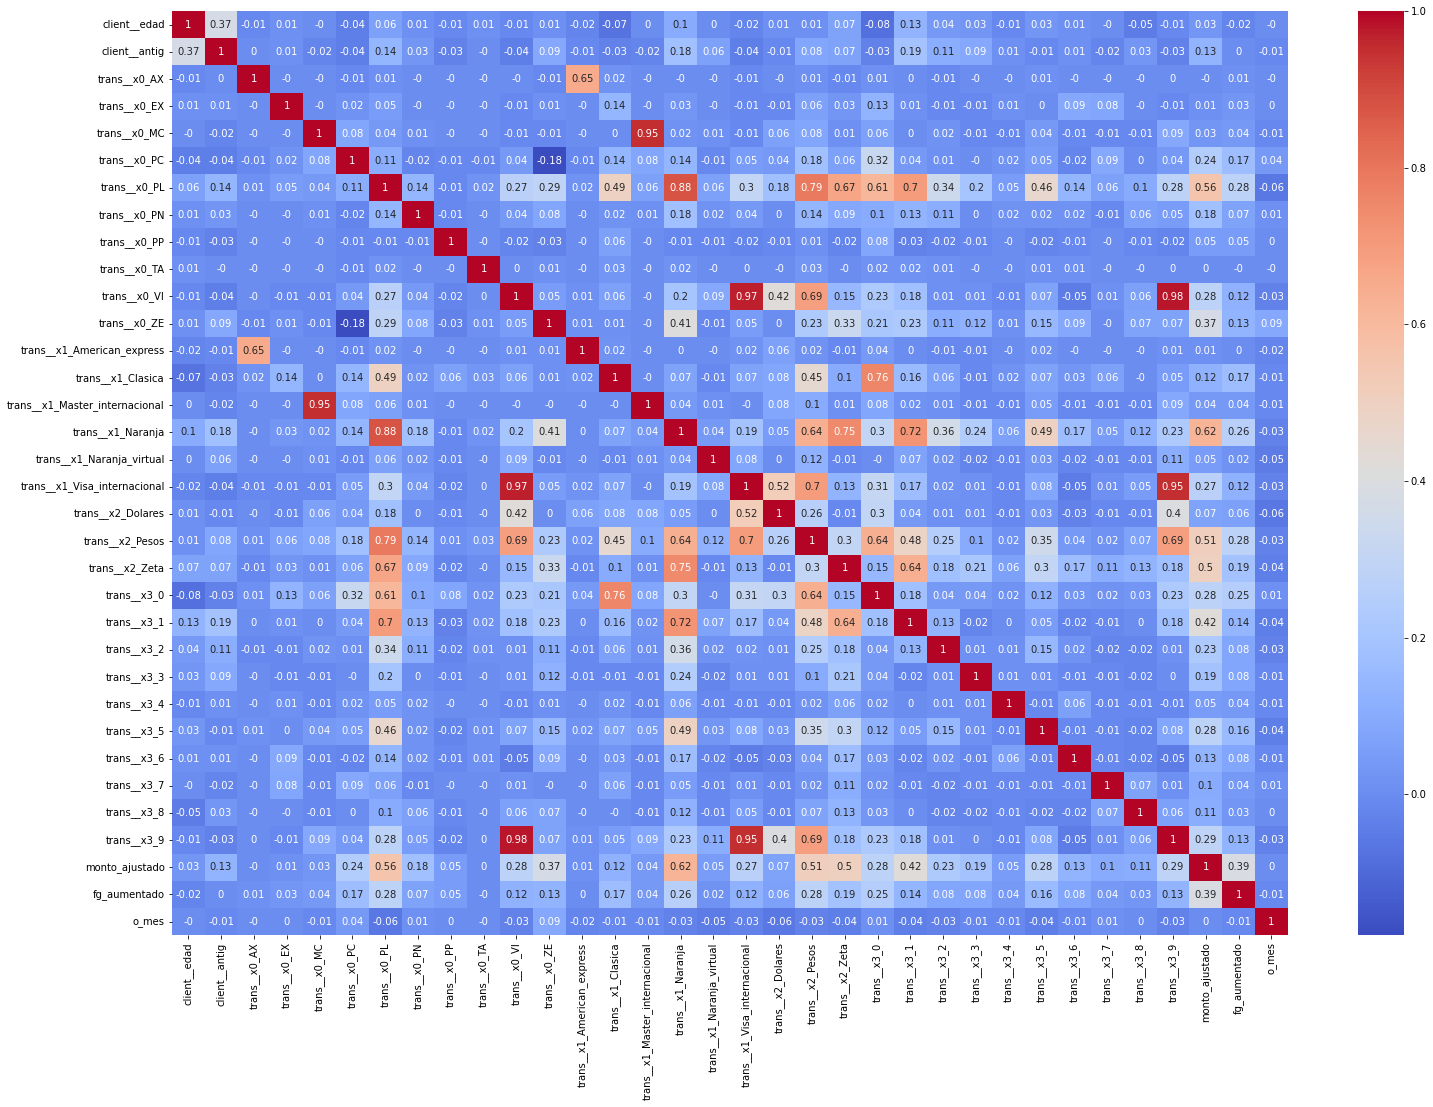

In [12]:
cols = [x for x in df.columns if 'client__x' not in x]
cols.remove('dni_titular_movimiento')
cols.remove('anio_mes_cupon')

plt.figure(figsize=(25,17))
corr = df[cols].corr().round(2)
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot=True, cmap= 'coolwarm')
plt.show()

La variables que consideramos descartar son aquellas que tienen una relacion fuerte con otra pero dentro del mismo concepto. Es decir, si un producto naranja se relaciona fuertemente con un tipo_producto, es probable que expliquen lo mismo. 

Por una cuestion de conservar la integridad de los datos, decidimos mantener la categoria 'producto_naranja' por sobre 'tipo_producto_movimiento'. Es decir que, en aquellos casos donde exista una correlacion fuerte entre un producto y un tipo_producto, optamos por eliminar el tipo_producto.

Columnas a eliminar:
- **trans__x1_Visa_internacional**: Tiene una correlacion lineal cercana a 1 con trans__x0_VI (producto VISA).
- **trans__x1_Master_internacional**: Tiene una correlacion lineal cercana a 1 con trans__x0_MC (producto MC).
- **trans__x1_American_express**: Tiene una correlacion lineal cercana a 1 con trans__x0_AX (producto AX).

In [13]:
df = df.drop(['trans__x1_Visa_internacional', 'trans__x1_Master_internacional', 'trans__x1_American_express'], axis=1)

df.shape

(7410, 54)

### Distribución de features numericas con respecto al target, monto_ajustado

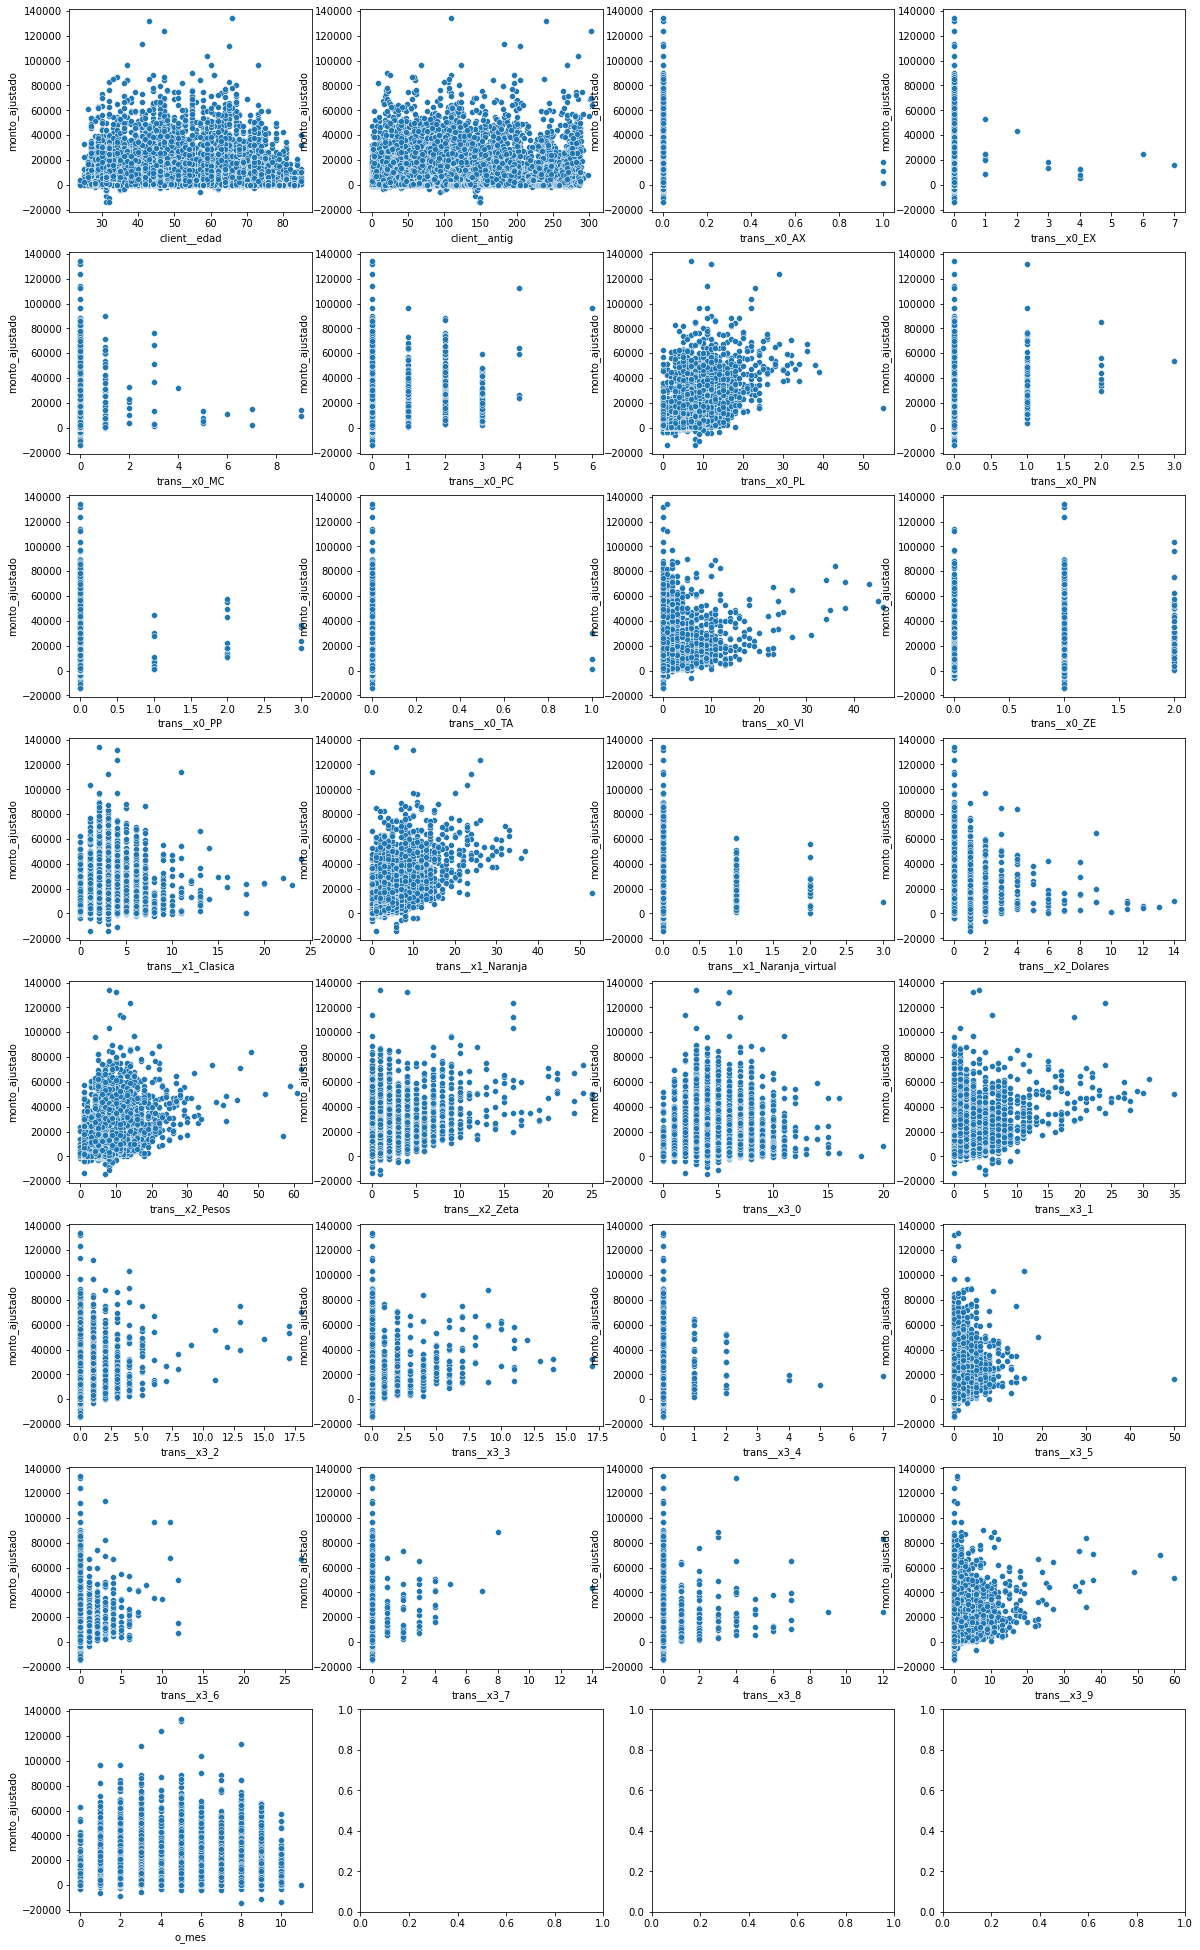

In [14]:
# Visualizamos solo las numericas y las transaccionales sumarizadas
cols = [x for x in df.columns.values if 'client__x' not in x]
cols.remove('dni_titular_movimiento')
cols.remove('anio_mes_cupon')
cols.remove('monto_ajustado')
cols.remove('fg_aumentado')


# plot
n_cols = 4
n_rows = math.ceil(len(cols)/n_cols)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 35))
count = 0
for i in cols:    
    row = math.floor(count / n_cols)
    col = count % n_cols
    ax = axs[row, col]
    sns.scatterplot(data=df, x=i, y='monto_ajustado', ax=ax)
    count =count +1

plt.show()

Analisis de distribucion de monto_ajustado con respecto a los features numericos

**client_edad**: No se distribuye de manera lineal. Sobre el contorno del grupo de puntos se podria dibujar una recta con pendiente hacia arriba en los consumos para clientes de menos de 40 años, mientras que para los clientes de mas de 60 se observa una pendiente hacia abajo pero menos pronunciada en los consumos. Y entre estos umbrales, los montos se mantienen dentro del rango 0-60000 aprox. Esto podria interpretarse como que hay ciertas franjas de edad con consumo mas estable que otras, y que es mayor el crecimiento en relacion gasto-edad en jovenes que el descenso en adultos mayores. Ademas en el rango de edad de 40-70, el nivel de consumo es mas estable. 

**client_antig**: Sobre esta relacion se puede observar cierta uniformidad en la distribucion, sin embargo existe un rango de antiguedad que podriamos limitar entre 200 y 280 aproximadamente, donde el rango de montos disminuye en comparación con el resto de la distribucion. Esto nos puede indicar que existe un grupo de clientes que tuvo menos gastos con ese rango de antiguedades.

**Productos AX, EX, MC, PC, PN, PP, TA**: No hay muchos datos para estas categorías. Se distribuyen de forma parecida, con concentración en 0 dado que la mayoría de los clientes no consume estos productos. Se puede ver de todas formas, una tendencia a haber menor consumo para los clientes que mas ocurrencias tienen. Esto último, quizas no aplica para PC, donde se puede observar una fluctuación mayor en el nivel de los montos.

**Producto PL**: La distribución parece ser uniforme para el rango entre 0 y 20 consumos. Normalmente los productos en PL son para 6, 12 o 18 cuotas, por lo que es normal que haya mas frecuencia en la aparición de este producto.

**Producto VI**: Se puede obsevar una concentracion cercana al 0 para esta variable, y una disminución tanto en montos como en casos a medida que aumentan los casos de VI, aunque con cierta dispersión. 

**Producto ZE**: Observando el grafico podemos estimar que existe una cantidad parecida de transacciones para 0 o 1 consumo mensual, y disminuye para 2. Es necesario considerar que este gráfico no se parece al de la moneda ZE, que por falta de conocimiento de dominio, no sabemos explicar.

### 1.4 Normalización de las variables

Para los modelos de regresión polinomial, puede ser necesario un escalado de los datos previo al entrenamiento, ya que la variable 'monto_ajustado' se distribuye en rangos más altos que las variables explicativas (variables X's). 

Por otro lado, para aquellos modelos de clasificación, probaremos por un lado la normalización de tipo L1 que permite eliminar la influencia de los valores atípicos, y por otro lado L2 que permite aumentar la distancia entre los diferentes puntos a clasificar, y de esta forma permite encontrar de manera más eficiente el hiperplano de separación. 

## 2. División del conjunto de datos

Debido a que nuestros datos se encuentran ordenados temporalmente, no consideramos pertinente hacer una mezcla aleatoria de los mismos, previo a la división.

Además, consideramos la existencia de suficientes muestras en cada uno de los meses respetando la distribución de productos y comercios existentes en el dataset original.

In [15]:
df.groupby(['anio_mes_cupon']).count()

,dni_titular_movimiento,client__edad,client__antig,client__x0_Hombre,client__x0_Mujer,client__x0_Sin Datos,client__x1_Sector_Educativo,client__x1_Sector_Empleado_Comercio,client__x1_Sector_Financiero,client__x1_Sector_No_Operativo,...,trans__x3_3,trans__x3_4,trans__x3_5,trans__x3_6,trans__x3_7,trans__x3_8,trans__x3_9,monto_ajustado,fg_aumentado,o_mes
anio_mes_cupon,,,,,,,,,,,,,,,,,,,,,
202007.0,365,365,365,365,365,365,365,365,365,365,...,365,365,365,365,365,365,365,365,365,365
202008.0,719,719,719,719,719,719,719,719,719,719,...,719,719,719,719,719,719,719,719,719,719
202009.0,716,716,716,716,716,716,716,716,716,716,...,716,716,716,716,716,716,716,716,716,716
202010.0,719,719,719,719,719,719,719,719,719,719,...,719,719,719,719,719,719,719,719,719,719
202011.0,719,719,719,719,719,719,719,719,719,719,...,719,719,719,719,719,719,719,719,719,719
202012.0,733,733,733,733,733,733,733,733,733,733,...,733,733,733,733,733,733,733,733,733,733
202101.0,758,758,758,758,758,758,758,758,758,758,...,758,758,758,758,758,758,758,758,758,758
202102.0,767,767,767,767,767,767,767,767,767,767,...,767,767,767,767,767,767,767,767,767,767
202103.0,758,758,758,758,758,758,758,758,758,758,...,758,758,758,758,758,758,758,758,758,758


In [16]:
df = df.drop(['anio_mes_cupon'], axis=1)

X = df[df['o_mes'] < 10]

X_r = X.drop(['monto_ajustado'], axis=1)
X_c = X.drop(['fg_aumentado', 'monto_ajustado'], axis=1)

# El conjunto de test se toma usando los datos de los ultimos 2 meses. 
X_test_r = X_r[X_r['o_mes'] >= X_r['o_mes'].max()]
X_train_val_r = X_r[X_r['o_mes'] < X_r['o_mes'].max()]
X_test_c = X_c[X_c['o_mes'] >= X_c['o_mes'].max()]
X_train_val_c = X_c[X_c['o_mes'] < X_c['o_mes'].max()]

y_reg_test = X[X['o_mes'] >= X['o_mes'].max()]['monto_ajustado']
y_reg_train = X[X['o_mes'] < X['o_mes'].max()]['monto_ajustado']

y_cla_test = X[X['o_mes'] >= X['o_mes'].max()]['fg_aumentado']
y_cla_train = X[X['o_mes'] < X['o_mes'].max()]['fg_aumentado']

X_train_r, X_val_r, y_train_r, y_val_r = train_test_split(X_train_val_r, y_reg_train, test_size=0.3, random_state=0, shuffle=False)
X_train_c, X_val_c, y_train_c, y_val_c = train_test_split(X_train_val_c, y_cla_train, test_size=0.3, random_state=0, shuffle=False)

print("Dimensión de conjunto de entrenamiento para regresión:",(X_train_r.shape, y_train_r.shape))
print("Dimensión de conjunto de validación para regresión:",(X_val_r.shape, y_val_r.shape))
print("Dimensión de conjunto de test para regresión:",(X_test_r.shape, y_reg_test.shape))

print("\nDimensión de conjunto de entrenamiento para clasificación:",(X_train_c.shape, y_train_c.shape))
print("Dimensión de conjunto de validación para clasificación:",(X_val_c.shape, y_val_c.shape))
print("Dimensión de conjunto de test para clasificación:",(X_test_c.shape, y_cla_test.shape))

Dimensión de conjunto de entrenamiento para regresión: ((4377, 52), (4377,))
Dimensión de conjunto de validación para regresión: ((1877, 52), (1877,))
Dimensión de conjunto de test para regresión: ((757, 52), (757,))

Dimensión de conjunto de entrenamiento para clasificación: ((4377, 51), (4377,))
Dimensión de conjunto de validación para clasificación: ((1877, 51), (1877,))
Dimensión de conjunto de test para clasificación: ((757, 51), (757,))


In [17]:
X_train_r.iloc[:,3:].sum()

client__x0_Hombre                       2032.0
client__x0_Mujer                        2324.0
client__x0_Sin Datos                      21.0
client__x1_Sector_Educativo              281.0
client__x1_Sector_Empleado_Comercio      791.0
client__x1_Sector_Financiero              45.0
client__x1_Sector_No_Operativo           413.0
client__x1_Sector_Operativo              397.0
client__x1_Sector_Salud                   17.0
client__x1_Sector_Seguridad              139.0
client__x1_Sector_Sin_Datos             2294.0
client__x2_Casado                       1653.0
client__x2_Otros                         500.0
client__x2_Sin_datos                      74.0
client__x2_Soltero                      2150.0
client__x3_REGION_CUYO                   531.0
client__x3_REGION_NORDESTE               454.0
client__x3_REGION_NOROESTE               848.0
client__x3_REGION_PAMPEANA              2129.0
client__x3_REGION_PATAGONIA              397.0
client__x3_SIN_DATOS                      18.0
trans__x0_AX 

In [18]:
X_val_r.iloc[:,3:].sum()

client__x0_Hombre                        847.0
client__x0_Mujer                        1013.0
client__x0_Sin Datos                      17.0
client__x1_Sector_Educativo               84.0
client__x1_Sector_Empleado_Comercio      432.0
client__x1_Sector_Financiero              25.0
client__x1_Sector_No_Operativo           118.0
client__x1_Sector_Operativo              160.0
client__x1_Sector_Salud                    9.0
client__x1_Sector_Seguridad               43.0
client__x1_Sector_Sin_Datos             1006.0
client__x2_Casado                        619.0
client__x2_Otros                         248.0
client__x2_Sin_datos                      36.0
client__x2_Soltero                       974.0
client__x3_REGION_CUYO                   215.0
client__x3_REGION_NORDESTE               232.0
client__x3_REGION_NOROESTE               275.0
client__x3_REGION_PAMPEANA              1008.0
client__x3_REGION_PATAGONIA              109.0
client__x3_SIN_DATOS                      38.0
trans__x0_AX 

In [19]:
X_test_r.iloc[:,3:].sum()

client__x0_Hombre                       349.0
client__x0_Mujer                        404.0
client__x0_Sin Datos                      4.0
client__x1_Sector_Educativo              42.0
client__x1_Sector_Empleado_Comercio     139.0
client__x1_Sector_Financiero              8.0
client__x1_Sector_No_Operativo           59.0
client__x1_Sector_Operativo              66.0
client__x1_Sector_Salud                   3.0
client__x1_Sector_Seguridad              22.0
client__x1_Sector_Sin_Datos             418.0
client__x2_Casado                       272.0
client__x2_Otros                         91.0
client__x2_Sin_datos                     11.0
client__x2_Soltero                      383.0
client__x3_REGION_CUYO                   92.0
client__x3_REGION_NORDESTE               86.0
client__x3_REGION_NOROESTE              140.0
client__x3_REGION_PAMPEANA              370.0
client__x3_REGION_PATAGONIA              61.0
client__x3_SIN_DATOS                      8.0
trans__x0_AX                      

In [20]:
X_test_r.head()

,dni_titular_movimiento,client__edad,client__antig,client__x0_Hombre,client__x0_Mujer,client__x0_Sin Datos,client__x1_Sector_Educativo,client__x1_Sector_Empleado_Comercio,client__x1_Sector_Financiero,client__x1_Sector_No_Operativo,...,trans__x3_2,trans__x3_3,trans__x3_4,trans__x3_5,trans__x3_6,trans__x3_7,trans__x3_8,trans__x3_9,fg_aumentado,o_mes
8,000000b5aea2c9ea7cc155f6ebcef97f826,47.0,233.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9
19,00000b8415f19846d12e852ebd0d52ec432,35.0,114.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0,9
29,00000d109ca5a0c6b3e76295f0292c38189,49.0,76.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9
40,000017309738c042c2ec144d5d3d3632673,37.0,63.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1,9
50,00001b02afa8956b08af05c339039882046,46.0,110.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0,9


## 3. Modelos de regresión 

### 3.1 Regresión polinominal con la variable antigüedad

#### Sin vector de Bias

En primer lugar, visualizamos la relación existente entre la variable target (monto_ajustado) y antigüedad.

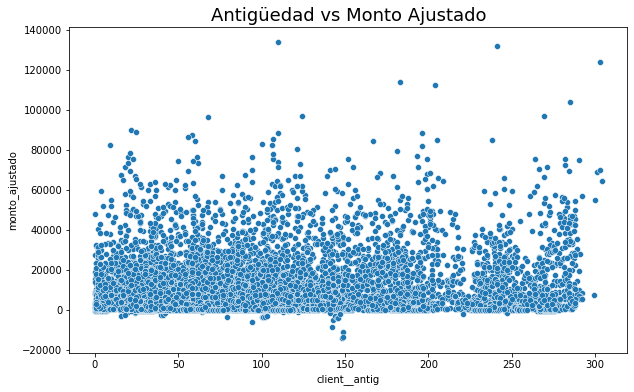

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='client__antig', y='monto_ajustado', palette="pastel")
plt.title('Antigüedad vs Monto Ajustado', fontsize=18)
plt.show()

Observamos que estas variables no tienen una relación concluyente. De igual forma, procedemos a instanciar un modelo de regresión polinomial para las mismas.

In [22]:
# Selección del feature antigüedad
X_train_antig = (X_train_r.loc[:, 'client__antig'].values.reshape(-1,1))
X_val_antig = (X_val_r.loc[:, 'client__antig'].values.reshape(-1,1))
X_train_antig.shape, X_val_antig.shape

((4377, 1), (1877, 1))

In [23]:
train_errors = []
valid_errors = []
degrees = [0,1,2,3,4,5,6,7,8,9,10,11,12]
for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_antig, y_train_r)
    
    # predict:
    y_train_pred = model.predict(X_train_antig)
    y_valid_pred = model.predict(X_val_antig)
    
    train_error = mean_squared_error(y_train_r, y_train_pred)
    valid_error = mean_squared_error(y_val_r, y_valid_pred)
    train_errors.append(train_error)
    valid_errors.append(valid_error)
    print(f'Grado {degree}: Train error {train_error.round(3)},Valid error {valid_error.round(3)}') 

Grado 0: Train error 230971749.155,Valid error 242936546.718
Grado 1: Train error 225538310.381,Valid error 240344045.195
Grado 2: Train error 225331669.433,Valid error 239699407.455
Grado 3: Train error 225324581.497,Valid error 239905570.511
Grado 4: Train error 224412585.343,Valid error 237526633.487
Grado 5: Train error 222620104.845,Valid error 237528720.325
Grado 6: Train error 222019211.645,Valid error 237101608.648
Grado 7: Train error 232499663.578,Valid error 247274984.058
Grado 8: Train error 239190789.823,Valid error 256136539.979
Grado 9: Train error 246528170.14,Valid error 268475079.869
Grado 10: Train error 268099680.304,Valid error 342481618.736
Grado 11: Train error 275218571.244,Valid error 398051039.719
Grado 12: Train error 282067735.291,Valid error 491098651.992


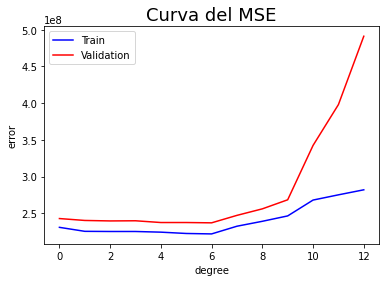

In [24]:
plt.plot(degrees, train_errors, color="blue", label="Train")
plt.plot(degrees, valid_errors, color="red", label="Validation")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.title('Curva del MSE', fontsize=18)
plt.show()

Observamos que a partir del polinomio de grado 6, se agravan los errores de train y validación. 

In [25]:
# sin vector bias primero
degree = 6
pf = PolynomialFeatures(degree, include_bias=False)
lr = LinearRegression(fit_intercept=False)  
model = make_pipeline(pf, lr)

In [26]:
# Entrenamos el modelo
model.fit(X_train_antig, y_train_r)

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=6, include_bias=False)),
                ('linearregression', LinearRegression(fit_intercept=False))])

In [27]:
# Vemos los parametros
lr.coef_ , lr.intercept_

(array([ 8.15971233e+02, -1.98337837e+01,  2.04032164e-01, -9.43517068e-04,
         1.84918551e-06, -1.06264881e-09]),
 0.0)

In [28]:
x_start = min(np.min(X_train_antig), np.min(X_val_antig))
x_end = max(np.max(X_train_antig), np.max(X_val_antig))
x = np.linspace(x_start, x_end).reshape(-1)
x.shape

(50,)

In [29]:
# Predicción
y_predic_antig = model.predict(x.reshape(-1, 1))

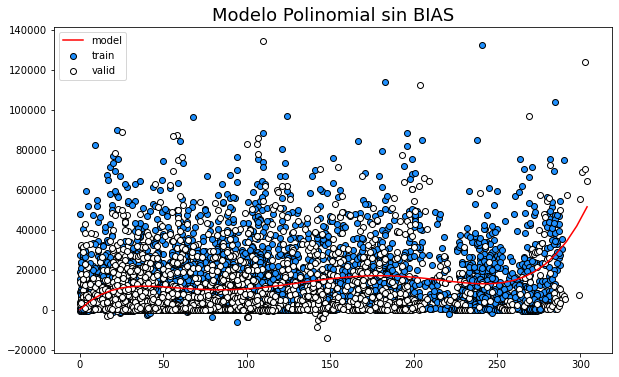

Train error: 222019211.645224
Valid error: 237101608.647988


In [30]:
plt.figure(figsize=(10,6))
plt.scatter(X_train_antig, y_train_r, color="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_val_antig, y_val_r, color="white", edgecolor="k", label="valid")
plt.plot(x, y_predic_antig, color="red", label="model") 
plt.legend()
plt.title('Modelo Polinomial sin BIAS',fontsize=18)
plt.show()

print(f'Train error: {train_errors[degree]:f}')
print(f'Valid error: {valid_errors[degree]:f}')

#### Con vector de Bias

In [31]:
# con vector bias 
degree = 6
pf = PolynomialFeatures(degree)
lr = LinearRegression(fit_intercept=False)  
model = make_pipeline(pf, lr)

In [32]:
# Entrenamos el modelo
model.fit(X_train_antig, y_train_r)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=6)),
                ('linearregression', LinearRegression(fit_intercept=False))])

In [33]:
# Vemos los parametros
lr.coef_ , lr.intercept_

(array([ 1.12014328e+04, -1.34766300e+02,  6.00041141e+00, -1.08665752e-01,
         9.21707854e-04, -3.51357519e-06,  4.87003111e-09]),
 0.0)

In [34]:
x_start = min(np.min(X_train_antig), np.min(X_val_antig))
x_end = max(np.max(X_train_antig), np.max(X_val_antig))
x = np.linspace(x_start, x_end).reshape(-1)
x.shape

(50,)

In [35]:
# Predicción
y_predic_antig_2 = model.predict(x.reshape(-1, 1))

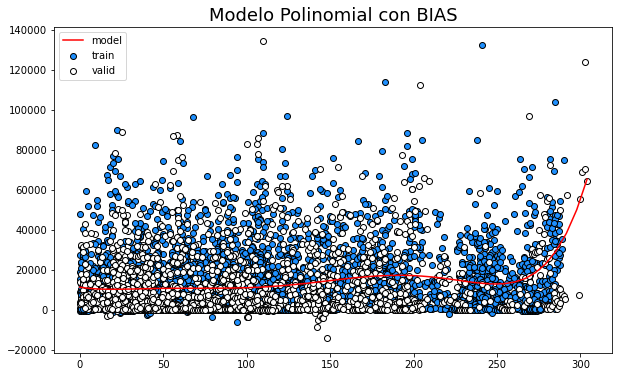

Train error: 222019211.645224
Valid error: 237101608.647988


In [36]:
plt.figure(figsize=(10,6))
plt.scatter(X_train_antig, y_train_r, color="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_val_antig, y_val_r, color="white", edgecolor="k", label="valid")
plt.plot(x, y_predic_antig_2, color="red", label="model") 
plt.legend()
plt.title('Modelo Polinomial con BIAS',fontsize=18)
plt.show()

print(f'Train error: {train_errors[degree]:f}')
print(f'Valid error: {valid_errors[degree]:f}')

#### Conclusión

En base a lo observado en el último gráfico, el tener o no el BIAS, no modifica el resultado de la regresión como pensamos, ya que el modelo no llega a captar la distribución de la variable en ninguno de los dos casos.

### 3.2 Regresion polinomial con varias variables

In [37]:
from sklearn.compose import make_column_transformer

sel_cols = ['trans__x1_Naranja', 'trans__x0_PL', 'trans__x2_Pesos', 'trans__x2_Zeta', 'trans__x3_1']

scaler = MaxAbsScaler() # Mantiene el signo y el 0
X_train_vs = scaler.fit_transform(X_train_r[sel_cols])
X_val_vs = scaler.transform(X_val_r[sel_cols])

y_train_vs = scaler.fit_transform(y_train_r.values.reshape(-1,1))
y_val_vs = scaler.transform(y_val_r.values.reshape(-1,1))

In [38]:
train_errors_vs = []
valid_errors_vs = []
degrees = np.arange(1,8)
for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_vs, y_train_vs)
    
    # predict:
    y_train_pred = model.predict(X_train_vs)
    y_valid_pred = model.predict(X_val_vs)
    
    # evaluate:
    train_error = mean_squared_error(y_train_vs, y_train_pred)
    val_error = mean_squared_error(y_val_vs, y_valid_pred)
    train_errors_vs.append(train_error)
    valid_errors_vs.append(val_error)
    print(f'Grado {degree}: Train error {train_error.round(3)}, Valid error {val_error.round(3)}')  

Grado 1: Train error 0.007, Valid error 0.008
Grado 2: Train error 0.007, Valid error 0.007
Grado 3: Train error 0.007, Valid error 0.008
Grado 4: Train error 0.006, Valid error 0.016
Grado 5: Train error 0.006, Valid error 0.836
Grado 6: Train error 0.005, Valid error 144.653
Grado 7: Train error 0.004, Valid error 98944.667


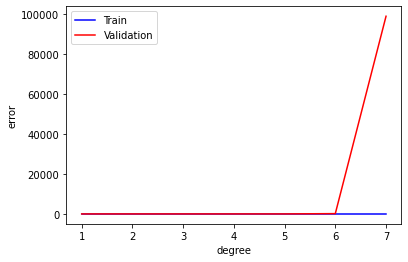

In [39]:
plt.plot(degrees, train_errors_vs, color="blue", label="Train")
plt.plot(degrees, valid_errors_vs, color="red", label="Validation")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

Observamos que a partir del polinomio de grado 6 el modelo comienza a hacer overfiting.

Esto se explica, ya que como pudimos ver en gráficos anteriores, los datos no se ajustan a modelos polinomiales.

### 3.3 Elección del mejor modelo de Regresión 

Observamos que el modelo de regresión polinomial multivariado, nos permite obtener mejores resultados que el anterior. Esto es así, debido a que los features escogidos explican mejor el comportamiento de nuestra variable target. Por otro lado, se realizo un escalado previo al entrenamiento. 
Procedemos a evaluar con los datos de test. 

In [40]:
degree = 4
pf = PolynomialFeatures(degree)
lr = LinearRegression(fit_intercept=False)  
model = make_pipeline(pf, lr)

# Entrenamos el modelo
model.fit(X_train_vs, y_train_vs)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression(fit_intercept=False))])

In [41]:
X_test_vs = scaler.fit_transform(X_test_r[sel_cols].values)
y_test_r_esc = scaler.fit_transform(y_reg_test.values.reshape(-1,1))
X_test_vs.shape , y_test_r_esc.shape

((757, 5), (757, 1))

In [42]:
# Predicción en test
y_train_pred = model.predict(X_train_vs)
y_valid_pred = model.predict(X_val_vs)
y_test_pred = model.predict(X_test_vs)

# testing:
train_error = mean_squared_error(y_train_vs, y_train_pred)
val_error = mean_squared_error(y_val_vs, y_valid_pred)
test_error = mean_squared_error(y_test_r_esc, y_test_pred)
print("Train error:", train_error.round(3), "Validation error:", val_error.round(3), "Test error:", test_error.round(3)) 

Train error: 0.006 Validation error: 0.016 Test error: 18.67


Observamos que el error en test es considerablemente más alto que el observado en las etapas de entrenamiento y validación. Sin embargo, es el mejor modelo que se puede instanciar con una regresión polinomial. 

## 4. Modelos de clasificación

### 4.1 Distribución de la variable target

In [43]:
y_train_c.value_counts()

0    2762
1    1615
Name: fg_aumentado, dtype: int64

La variable target no está balanceada, hay una relación de 2/1 aprox. en el conjunto de etiquetas. Esto nos da la pauta de que la métrica a la cual tenemos que darle más importancia es al F1-Score de la etiqueta 1, es decir queremos tener una buena Precision y Recall para la etiqueta de menor cuantía.

### 4.2 Modelos lineales de clasificación 

#### 4.2.1 Regresión Logistica

In [44]:
X_train_c.shape, y_train_c.shape

((4377, 51), (4377,))

In [45]:
num_cols = np.array(['client__edad', 'client__antig','o_mes'])
cat_cols = np.array(X_train_c.columns[3:-1])

In [46]:
X_train_c.columns.values

array(['dni_titular_movimiento', 'client__edad', 'client__antig',
       'client__x0_Hombre', 'client__x0_Mujer', 'client__x0_Sin Datos',
       'client__x1_Sector_Educativo',
       'client__x1_Sector_Empleado_Comercio',
       'client__x1_Sector_Financiero', 'client__x1_Sector_No_Operativo',
       'client__x1_Sector_Operativo', 'client__x1_Sector_Salud',
       'client__x1_Sector_Seguridad', 'client__x1_Sector_Sin_Datos',
       'client__x2_Casado', 'client__x2_Otros', 'client__x2_Sin_datos',
       'client__x2_Soltero', 'client__x3_REGION_CUYO',
       'client__x3_REGION_NORDESTE', 'client__x3_REGION_NOROESTE',
       'client__x3_REGION_PAMPEANA', 'client__x3_REGION_PATAGONIA',
       'client__x3_SIN_DATOS', 'trans__x0_AX', 'trans__x0_EX',
       'trans__x0_MC', 'trans__x0_PC', 'trans__x0_PL', 'trans__x0_PN',
       'trans__x0_PP', 'trans__x0_TA', 'trans__x0_VI', 'trans__x0_ZE',
       'trans__x1_Clasica', 'trans__x1_Naranja',
       'trans__x1_Naranja_virtual', 'trans__x2_Dolares'

In [47]:
X_train_lreg = X_train_c[np.concatenate((num_cols,cat_cols))]
X_val_lreg = X_val_c[np.concatenate((num_cols,cat_cols))]

pipe = Pipeline([('scaler', StandardScaler()), ('lreg', LogisticRegression(random_state=0))])

pipe.fit(X_train_lreg, y_train_c)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lreg', LogisticRegression(random_state=0))])

In [48]:
pipe['lreg'].classes_

array([0, 1], dtype=int64)

In [49]:
pipe['lreg'].coef_

array([[-0.01772817, -0.02012798,  0.10096966, -0.01475566,  0.01959424,
        -0.03501281, -0.0176944 , -0.00662375,  0.00788959,  0.00904513,
         0.0050523 , -0.0329825 , -0.0152172 ,  0.01344509, -0.01411309,
        -0.00604397,  0.05760969,  0.00267536,  0.0020308 ,  0.01222288,
         0.03081764, -0.01717658, -0.02985524,  0.00920766,  0.0315278 ,
        -0.01076598,  0.08432184,  0.23327532, -0.09553444,  0.02957971,
         0.24726878, -0.02848046,  0.07113263,  0.18074433,  0.31213452,
         0.65458476,  0.04171446,  0.03513725,  0.03686714, -0.07047703,
        -0.01043072, -0.09527278, -0.08573188,  0.01452913,  0.03583974,
         0.05739071,  0.06935029,  0.03753626,  0.01814309,  0.06278979]])

In [50]:
pipe['lreg'].get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [51]:
y_train_pred_lreg = pipe.predict(X_train_lreg)
y_val_pred_lreg = pipe.predict(X_val_lreg)

In [52]:
# Evaluar train
text = "Logistic Regression - Reporte de clasificación del conjunto de train" 
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_train_c, y_train_pred_lreg))

Logistic Regression - Reporte de clasificación del conjunto de train
              precision    recall  f1-score   support

           0       0.70      0.87      0.77      2762
           1       0.61      0.35      0.44      1615

    accuracy                           0.68      4377
   macro avg       0.65      0.61      0.61      4377
weighted avg       0.66      0.68      0.65      4377



In [53]:
# Evaluar validacion
text = "Logistic Regression - Reporte de clasificación del conjunto de validacion" 
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_val_c, y_val_pred_lreg))

Logistic Regression - Reporte de clasificación del conjunto de validacion
              precision    recall  f1-score   support

           0       0.68      0.86      0.76      1164
           1       0.60      0.35      0.44       713

    accuracy                           0.67      1877
   macro avg       0.64      0.60      0.60      1877
weighted avg       0.65      0.67      0.64      1877



<Figure size 432x288 with 0 Axes>

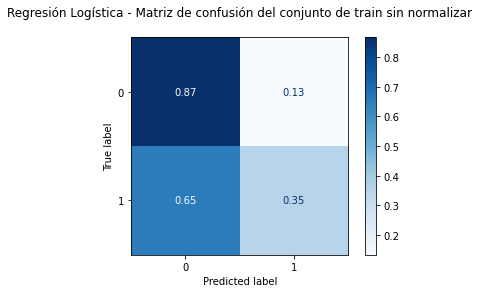

In [54]:
plt.figure()
plot_confusion_matrix(estimator=pipe, X=X_train_lreg, y_true=y_train_c,
                      normalize='true', cmap='Blues').ax_ \
                      .set_title('Regresión Logística - Matriz de confusión del conjunto de train sin normalizar\n')
plt.show()

<Figure size 432x288 with 0 Axes>

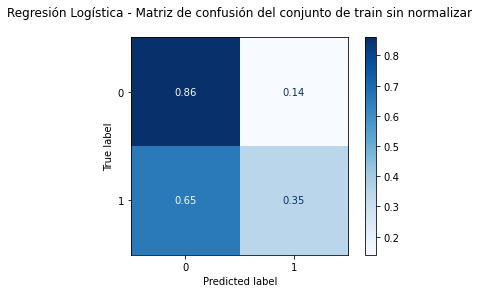

In [55]:
plt.figure()
plot_confusion_matrix(estimator=pipe, X=X_val_lreg, y_true=y_val_c,
                      normalize='true', cmap='Blues').ax_ \
                      .set_title('Regresión Logística - Matriz de confusión del conjunto de train sin normalizar\n')
plt.show()

Los resultados para el modelo de Regresión Logístico, no son buenos, sin embargo nos da una primera referencia de métricas, para poder mejorar en los siguientes modelos. 
Sin bien se intento normalizar los features (Aplicando L1), la predicción no era buena (no predecia la etiqueta 0), por lo cual optamos por realizar un escalado de los datos utilizando StandardScaler. 

#### 4.2.2 SGDClassifier 

In [56]:
scaler = StandardScaler()
X_train_sgd = scaler.fit_transform(X_train_lreg)
X_val_sgd = scaler.transform(X_val_lreg)
X_train_sgd.shape, X_val_sgd.shape

((4377, 50), (1877, 50))

In [57]:
param_grid = {
    'loss': ['hinge','log', 'modified_huber', 'squared_hinge', 'perceptron'],
    'alpha': [0.001, 0.01, 0.1, 1],
    'penalty': ['l2','l1'],
    'eta0': [1e-3, 1e-4, 1e-5, 10],
    'learning_rate': ['optimal', 'constant', 'adaptive']
    #'max_iter': [1000, 2000, 5000]
}

model = SGDClassifier(random_state= 0, shuffle=False)
cv = GridSearchCV(model, param_grid, scoring='f1',cv=3)
cv.fit(X_train_sgd, y_train_c)
#cv.fit(X, y)

#results = cv.cv_results_
#params = results['params']

GridSearchCV(cv=3, estimator=SGDClassifier(random_state=0, shuffle=False),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1],
                         'eta0': [0.001, 0.0001, 1e-05, 10],
                         'learning_rate': ['optimal', 'constant', 'adaptive'],
                         'loss': ['hinge', 'log', 'modified_huber',
                                  'squared_hinge', 'perceptron'],
                         'penalty': ['l2', 'l1']},
             scoring='f1')

In [58]:
cv.best_estimator_

SGDClassifier(alpha=0.01, eta0=1e-05, learning_rate='constant', loss='log',
              random_state=0, shuffle=False)

In [59]:
clf_best = cv.best_estimator_
y_train_pred = clf_best.predict(X_train_sgd)
y_val_pred = clf_best.predict(X_val_sgd)

In [60]:
# Métricas en train
text = "SGDClassifier - Reporte de clasificación del conjunto de train" 
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_train_c, y_train_pred))

SGDClassifier - Reporte de clasificación del conjunto de train
              precision    recall  f1-score   support

           0       0.72      0.77      0.75      2762
           1       0.56      0.50      0.53      1615

    accuracy                           0.67      4377
   macro avg       0.64      0.63      0.64      4377
weighted avg       0.66      0.67      0.67      4377



In [61]:
# Evaluar con datos de validación
text = "SGDClassifier - Reporte de clasificación del conjunto de validación" 
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_val_c, y_val_pred))

SGDClassifier - Reporte de clasificación del conjunto de validación
              precision    recall  f1-score   support

           0       0.71      0.78      0.74      1164
           1       0.57      0.48      0.52       713

    accuracy                           0.66      1877
   macro avg       0.64      0.63      0.63      1877
weighted avg       0.66      0.66      0.66      1877



<Figure size 432x288 with 0 Axes>

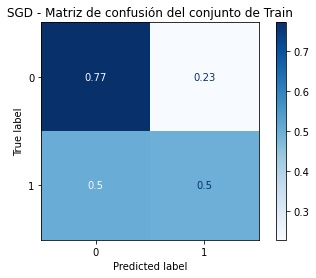

In [62]:
plt.figure()
plot_confusion_matrix(estimator=clf_best, X=X_train_sgd, y_true=y_train_c,
                      normalize='true', cmap='Blues').ax_ \
                      .set_title('SGD - Matriz de confusión del conjunto de Train')
plt.show()

<Figure size 432x288 with 0 Axes>

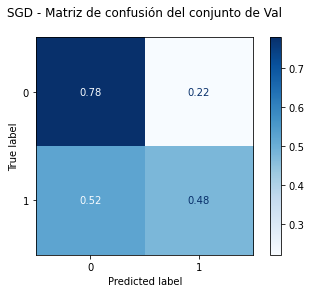

In [63]:
plt.figure()
plot_confusion_matrix(estimator=clf_best, X=X_val_sgd, y_true=y_val_c,
                      normalize='true', cmap='Blues').ax_ \
                      .set_title('SGD - Matriz de confusión del conjunto de Val\n')
plt.show()

Observamos que, dentro de los modelos de clasificación lineal, las métricas obtenidas son mejores para el caso de la regresión logística, con parámetros por defecto calculada en primer instancia.

### 4.3 Modelos no lineales de clasificación: Árboles de decisión 

In [64]:
X_train_tree = X_train_sgd.copy()
X_val_tree = X_val_sgd.copy()

In [65]:
param_grid = {
    'max_depth': [10, 15, 20, 25, 30],
    'criterion':['gini', 'entropy'],
    'min_samples_split': [3,5, 10, 15, 20, 25,30],
    'min_samples_leaf':[2, 4, 5, 6, 8, 10]}

model_tree = DecisionTreeClassifier(random_state= 0)
cv_tree = GridSearchCV(model_tree, param_grid, scoring='f1', cv=5)
cv_tree.fit(X_train_tree, y_train_c)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 25, 30],
                         'min_samples_leaf': [2, 4, 5, 6, 8, 10],
                         'min_samples_split': [3, 5, 10, 15, 20, 25, 30]},
             scoring='f1')

In [66]:
cv_tree.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=4,
                       min_samples_split=30, random_state=0)

In [67]:
clf_best_tree = cv_tree.best_estimator_
y_train_pred_tree = clf_best_tree.predict(X_train_tree)
y_val_pred_tree = clf_best_tree.predict(X_val_tree)

In [68]:
# Métricas en train
text = "Árbol - Reporte de clasificación del conjunto de train" 
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_train_c, y_train_pred_tree))

Árbol - Reporte de clasificación del conjunto de train
              precision    recall  f1-score   support

           0       0.79      0.86      0.83      2762
           1       0.72      0.61      0.66      1615

    accuracy                           0.77      4377
   macro avg       0.76      0.74      0.74      4377
weighted avg       0.77      0.77      0.77      4377



In [69]:
# Métricas en validación
text = "Árbol - Reporte de clasificación del conjunto de validación" 
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_val_c, y_val_pred_tree))

Árbol - Reporte de clasificación del conjunto de validación
              precision    recall  f1-score   support

           0       0.70      0.75      0.72      1164
           1       0.54      0.47      0.50       713

    accuracy                           0.64      1877
   macro avg       0.62      0.61      0.61      1877
weighted avg       0.64      0.64      0.64      1877



En una primera instancia se creo un modelo de árbol de decisión con parametros por defecto, el cual llegaba a una profundidad de 33, realizando overfiting sobre el conjunto de entrenamiento. Sin embargo, esto nos permitió comprobar que es posible la predicción de la variable objetivo utilizando este modelo y también, tener una serie de parémetros de referencia para poder encontrar el mejor árbol. 

Se observa que se logran mejores resultados en f1-score con un árbol de decisión, en comparación con los modelos lineales instanciados en el apartado anterior.

<Figure size 432x288 with 0 Axes>

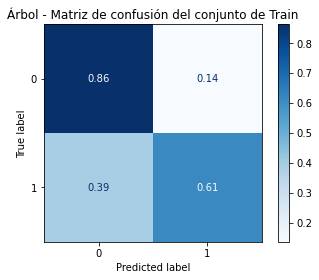

In [70]:
plt.figure()
plot_confusion_matrix(estimator=clf_best_tree, X=X_train_tree, y_true=y_train_c,
                      normalize='true', cmap='Blues').ax_ \
                      .set_title('Árbol - Matriz de confusión del conjunto de Train')
plt.show()

<Figure size 432x288 with 0 Axes>

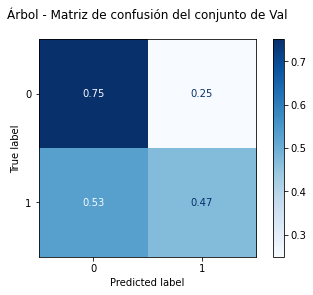

In [71]:
plt.figure()
plot_confusion_matrix(estimator=clf_best_tree, X=X_val_tree, y_true=y_val_c,
                      normalize='true', cmap='Blues').ax_ \
                      .set_title('Árbol - Matriz de confusión del conjunto de Val\n')
plt.show()

### 4.4 Elección del mejor modelo de Clasificación

In [72]:
X_test_c = X_test_c[np.concatenate((num_cols,cat_cols))]
X_test_c = scaler.fit_transform(X_test_c)

# Entrenamos el modelo
clf_best_tree.fit(X_train_tree, y_train_c)

# Predicción en val y test
y_train_pred_tree = clf_best_tree.predict(X_train_tree)
y_val_pred_tree = clf_best_tree.predict(X_val_tree)
y_test_pred_tree = clf_best_tree.predict(X_test_c)

In [73]:
# Métricas en train
text = "Árbol - Reporte de clasificación del conjunto de train" 
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_train_c, y_train_pred_tree))

Árbol - Reporte de clasificación del conjunto de train
              precision    recall  f1-score   support

           0       0.79      0.86      0.83      2762
           1       0.72      0.61      0.66      1615

    accuracy                           0.77      4377
   macro avg       0.76      0.74      0.74      4377
weighted avg       0.77      0.77      0.77      4377



In [74]:
# Métricas en validación
text = "Árbol - Reporte de clasificación del conjunto de validación" 
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_val_c, y_val_pred_tree))

Árbol - Reporte de clasificación del conjunto de validación
              precision    recall  f1-score   support

           0       0.70      0.75      0.72      1164
           1       0.54      0.47      0.50       713

    accuracy                           0.64      1877
   macro avg       0.62      0.61      0.61      1877
weighted avg       0.64      0.64      0.64      1877



In [75]:
# Métricas en test
text = "Árbol - Reporte de clasificación del conjunto de validación" 
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(classification_report(y_cla_test, y_test_pred_tree))

Árbol - Reporte de clasificación del conjunto de validación
              precision    recall  f1-score   support

           0       0.77      0.72      0.74       545
           1       0.38      0.45      0.42       212

    accuracy                           0.64       757
   macro avg       0.58      0.59      0.58       757
weighted avg       0.66      0.64      0.65       757



<Figure size 432x288 with 0 Axes>

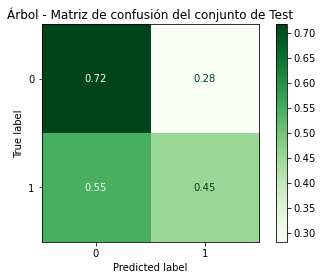

In [76]:
plt.figure()
plot_confusion_matrix(estimator=clf_best_tree, X=X_test_c, y_true=y_cla_test,
                      normalize='true', cmap='Greens').ax_ \
                      .set_title('Árbol - Matriz de confusión del conjunto de Test')
plt.show()